torch.Size([512, 1, 28, 28]) torch.Size([512]) tensor(-0.4242) tensor(2.8215)


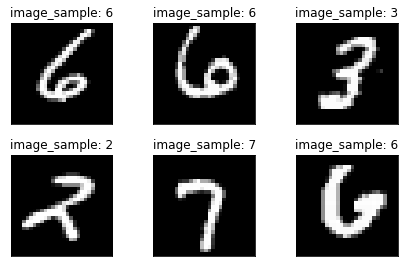

0 0 0.10715392976999283
0 10 0.09441263973712921
0 20 0.08484604209661484
0 30 0.07904400676488876
0 40 0.07372516393661499
0 50 0.07012302428483963
0 60 0.06528689712285995
0 70 0.0632181391119957
0 80 0.06004096940159798
0 90 0.05767397955060005
0 100 0.055417053401470184
0 110 0.0505610816180706
1 0 0.05042746663093567
1 10 0.048977602273225784
1 20 0.04761997610330582
1 30 0.04650115221738815
1 40 0.047395240515470505
1 50 0.04471096768975258
1 60 0.042456548660993576
1 70 0.04422177001833916
1 80 0.04179307073354721
1 90 0.041145212948322296
1 100 0.041938502341508865
1 110 0.04079464077949524
2 0 0.040465932339429855
2 10 0.03748380392789841
2 20 0.04005386680364609
2 30 0.04020233079791069
2 40 0.037923917174339294
2 50 0.03816062957048416
2 60 0.03467276319861412
2 70 0.033208537846803665
2 80 0.035218071192502975
2 90 0.035675473511219025
2 100 0.03398799151182175
2 110 0.034241534769535065


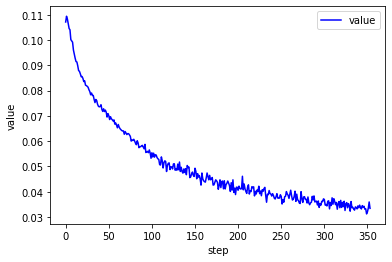

test acc: 0.8815


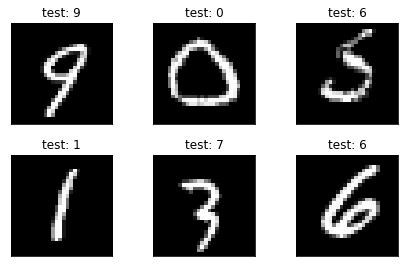

In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim

import torchvision
from matplotlib import pyplot as plt
import utils

def plot_curve(data):
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')
    plt.legend(['value'], loc='upper right')
    plt.xlabel('step')
    plt.ylabel('value')
    plt.show()


def plot_image(img, label, name):

    fig = plt.figure()
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.tight_layout()
        plt.imshow(img[i, 0]*0.3081+0.1307, cmap='gray', interpolation='none')
        plt.title("{}: {}".format(name,label[i].item()))
        plt.xticks([])
        plt.yticks([])
    plt.show()

def one_hot(label, depth=10):
    out = torch.zeros(label.size(0), depth)
    idx = torch.LongTensor(label).view(-1, 1)
    out.scatter_(dim=1, index=idx, value=1)
    return out

batch_size=512
train_loader=torch.utils.data.DataLoader(torchvision.datasets.MNIST('mnist_data',train=True,download=True,transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.1307,),(0.3081,))])),batch_size=batch_size,shuffle=True)

test_loader=torch.utils.data.DataLoader(torchvision.datasets.MNIST('mnist_data/',train=False,download=True,transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.1307,),(0.3081,))])),batch_size=batch_size,shuffle=True)

x,y=next(iter(train_loader))
print(x.shape,y.shape,x.min(),x.max())
plot_image(x,y,'image_sample')

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1=nn.Linear(28*28,256)
        self.fc2=nn.Linear(256,64)
        self.fc3=nn.Linear(64,10)
    
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
    
net=Net()
optimizer=optim.SGD(net.parameters(),lr=0.01,momentum=0.9)
train_loss=[]
for epoch in range(3):
    for batch_idx,(x,y) in enumerate(train_loader):
        x=x.view(x.size(0),28*28)
        out=net(x)
        y_onehot=one_hot(y)
        loss=F.mse_loss(out,y_onehot)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
        
        if batch_idx %10==0:
            print(epoch,batch_idx,loss.item())

plot_curve(train_loss)

total_correct=0
for x,y in test_loader:
    x=x.view(x.size(0),28*28)
    out=net(x)
    pred=out.argmax(dim=1)
    correct=pred.eq(y).sum().float().item()
    total_correct+=correct
total_num=len(test_loader.dataset)
acc=total_correct/total_num
print("test acc:",acc)

x,y=next(iter(test_loader))
out=net(x.view(x.size(0),28*28))
pred=out.argmax(dim=1)
plot_image(x,pred,'test')